In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
#import test1 as t
import seaborn as sns
%matplotlib inline


In [20]:
df = pd.read_csv('survey-results-public.csv')
schema = pd.read_csv('survey-results-schema.csv')
df.head(3)

Respondent            Professional ProgramHobby         Country  \
0           1                 Student    Yes, both   United States   
1           2                 Student    Yes, both  United Kingdom   
2           3  Professional developer    Yes, both  United Kingdom   

       University                        EmploymentStatus  \
0              No  Not employed, and not looking for work   
1  Yes, full-time                      Employed part-time   
2              No                      Employed full-time   

                                     FormalEducation  \
0                                   Secondary school   
1  Some college/university study without earning ...   
2                                  Bachelor's degree   

                             MajorUndergrad  \
0                                       NaN   
1  Computer science or software engineering   
2  Computer science or software engineering   

                                          HomeRemote  \
0                                                NaN   
1              More than half, but not all, the time   
2  Less than half the time, but at least one day ...   

                CompanySize  ... StackOverflowMakeMoney Gender  \
0                       NaN  ...      Strongly disagree   Male   
1        20 to 99 employees  ...      Strongly disagree   Male   
2  10,000 or more employees  ...               Disagree   Male   

  HighestEducationParents                          Race         SurveyLong  \
0             High school  White or of European descent  Strongly disagree   
1       A master's degree  White or of European descent     Somewhat agree   
2   A professional degree  White or of European descent     Somewhat agree   

  QuestionsInteresting QuestionsConfusing InterestedAnswers    Salary  \
0       Strongly agree           Disagree    Strongly agree       NaN   
1       Somewhat agree           Disagree    Strongly agree       NaN   
2                Agree           Disagree             Agree  113750.0   

   ExpectedSalary  
0             NaN  
1         37500.0  
2             NaN  

[3 rows x 154 columns]

In [21]:
schema.head(3)

Column                                           Question
0    Respondent                               Respondent ID number
1  Professional         Which of the following best describes you?
2  ProgramHobby  Do you program as a hobby or contribute to ope...

In [22]:
schema[schema.Column=='CousinEducation']['Question'].values

array(["Let's pretend you have a distant cousin. They are 24 years old, have a college degree in a field not related to computer programming, and have been working a non-coding job for the last two years. They want your advice on how to switch to a career as a software developer. Which of the following options would you most strongly recommend to your cousin?\nLet's pretend you have a distant cousin named Robert. He is 24 years old, has a college degree in a field not related to computer programming, and has been working a non-coding job for the last two years. He wants your advice on how to switch to a career as a software developer. Which of the following options would you most strongly recommend to Robert?\nLet's pretend you have a distant cousin named Alice. She is 24 years old, has a college degree in a field not related to computer programming, and has been working a non-coding job for the last two years. She wants your advice on how to switch to a career as a software developer.

# 1 How To Break Into the Field

In [23]:
#The description of each of the 147 columns is given in the file "schema".
# So we create a function which will take input of any column name and get its description from the "schema"

In [24]:
## How To Break Into the Field
def get_description(schema, column_name):
    '''
    INPUT - schema - pandas dataframe with the schema of the developers survey
            column_name - string - the name of the column you would like to know about
    OUTPUT -
            desc - string - the description of the column
    '''
    desc = list(schema[schema['Column'] == column_name]['Question'])[0]
    return desc

In [25]:
# for example we can find the description of 'CousinEducation' using the following function
get_description(schema, 'CousinEducation')

"Let's pretend you have a distant cousin. They are 24 years old, have a college degree in a field not related to computer programming, and have been working a non-coding job for the last two years. They want your advice on how to switch to a career as a software developer. Which of the following options would you most strongly recommend to your cousin?\nLet's pretend you have a distant cousin named Robert. He is 24 years old, has a college degree in a field not related to computer programming, and has been working a non-coding job for the last two years. He wants your advice on how to switch to a career as a software developer. Which of the following options would you most strongly recommend to Robert?\nLet's pretend you have a distant cousin named Alice. She is 24 years old, has a college degree in a field not related to computer programming, and has been working a non-coding job for the last two years. She wants your advice on how to switch to a career as a software developer. Which 

### 1.1 Analysis of "CousinEducation" field

In [26]:
schema[schema.Column=='CousinEducation']['Question'].values

array(["Let's pretend you have a distant cousin. They are 24 years old, have a college degree in a field not related to computer programming, and have been working a non-coding job for the last two years. They want your advice on how to switch to a career as a software developer. Which of the following options would you most strongly recommend to your cousin?\nLet's pretend you have a distant cousin named Robert. He is 24 years old, has a college degree in a field not related to computer programming, and has been working a non-coding job for the last two years. He wants your advice on how to switch to a career as a software developer. Which of the following options would you most strongly recommend to Robert?\nLet's pretend you have a distant cousin named Alice. She is 24 years old, has a college degree in a field not related to computer programming, and has been working a non-coding job for the last two years. She wants your advice on how to switch to a career as a software developer.

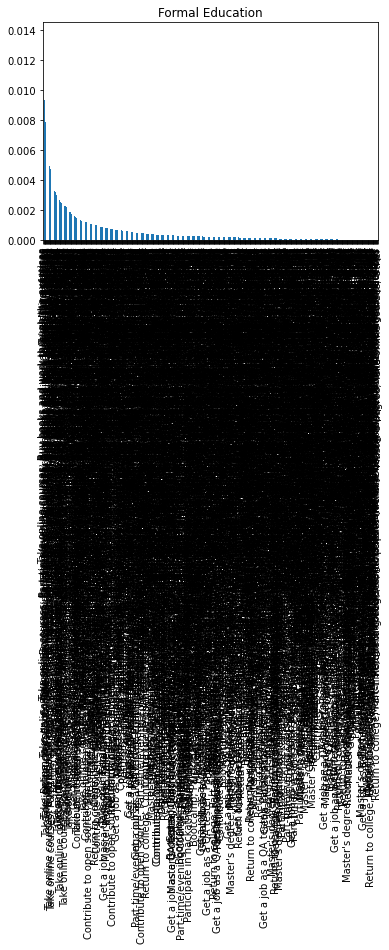

In [27]:
## Plotting 'CousinEducation' values
(df['CousinEducation'].value_counts()/df.shape[0]).plot(kind='bar')
plt.title('Formal Education')
plt.show()

#### Data Cleaning to check Relation of "CousinEducation" with job satisfaction

In [28]:
df['CousinEducation'].value_counts()[0:25]

Take online courses; Buy books and work through the exercises                                                                          711
Take online courses                                                                                                                    551
None of these                                                                                                                          523
Take online courses; Part-time/evening courses; Buy books and work through the exercises                                               479
Take online courses; Bootcamp; Part-time/evening courses; Buy books and work through the exercises                                     465
Other                                                                                                                                  403
Return to college; Take online courses; Part-time/evening courses; Buy books and work through the exercises                            384
Take online courses; Contri

In [29]:
# we can see the possible values are the following
possible_vals = ["Take online courses", "Buy books and work through the exercises", 
                 "None of these", "Part-time/evening courses", "Return to college",
                 "Contribute to open source", "Conferences/meet-ups", "Bootcamp",
                 "Get a job as a QA tester", "Participate in online coding competitions",
                 "Master's degree", "Participate in hackathons", "Other"]

In [30]:
# We shall make a function which will count the values of the different values
# first we convert the value_count() out put using reset_index
df['CousinEducation'].value_counts().reset_index()

index  CousinEducation
0    Take online courses; Buy books and work throug...              711
1                                  Take online courses              551
2                                        None of these              523
3    Take online courses; Part-time/evening courses...              479
4    Take online courses; Bootcamp; Part-time/eveni...              465
..                                                 ...              ...
730  Master's degree; Participate in hackathons; Bu...                1
731  Master's degree; Get a job as a QA tester; Boo...                1
732  Return to college; Participate in hackathons; ...                1
733  Return to college; Part-time/evening courses; ...                1
734        Master's degree; Take online courses; Other                1

[735 rows x 2 columns]

In [31]:
df1=df['CousinEducation'].value_counts().reset_index()

In [32]:
## then 
from collections import defaultdict
new_df = defaultdict(int)
for val in possible_vals:
        for idx in range(df1.shape[0]):
            if val in df1['index'][idx]:
                new_df[val] += int(df1['CousinEducation'][idx])
new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
new_df.columns = ['cousinEducation', 'count']
new_df.sort_values('count', ascending=False, inplace=True)
new_df.head(2)


cousinEducation  count
0                       Take online courses  15246
1  Buy books and work through the exercises  11750

In [33]:
new_df.index.values

array([ 0,  1,  3,  5,  7,  6,  4,  9,  8, 11, 10, 12,  2], dtype=int64)

In [34]:
new_df['cousinEducation'].values

array(['Take online courses', 'Buy books and work through the exercises',
       'Part-time/evening courses', 'Contribute to open source',
       'Bootcamp', 'Conferences/meet-ups', 'Return to college',
       'Participate in online coding competitions',
       'Get a job as a QA tester', 'Participate in hackathons',
       "Master's degree", 'Other', 'None of these'], dtype=object)

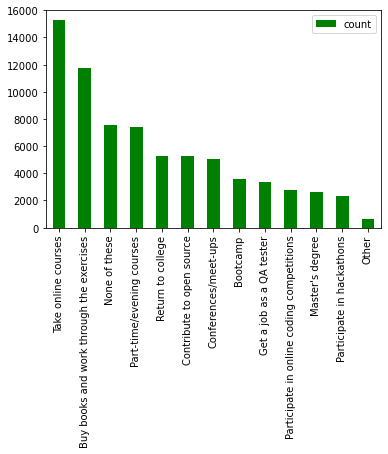

In [35]:
new_df['count'].plot(kind='bar', legend='index',color='green')
plt.xticks(new_df.index.values,new_df['cousinEducation'].values, rotation ='90')
plt.show()

In [58]:
## we can combine above operation in shape of 2 functions also
def total_count(df, col1, col2, look_for):
    '''
    INPUT:
    df - the pandas dataframe you want to search
    col1 - the column name you want to look through
    col2 - the column you want to count values from
    look_for - a list of strings you want to search for in each row of df[col]
    OUTPUT:
    new_df - a dataframe of each look_for with the count of how often it shows up
    '''
    # https://www.accelebrate.com/blog/using-defaultdict-python
    
    new_df = defaultdict(int)
    for val in look_for:
        for idx in range(df.shape[0]):
            if val in df[col1][idx]:
                new_df[val] += int(df[col2][idx])
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = [col1, col2]
    new_df.sort_values(col2, ascending=False, inplace=True)
    return new_df

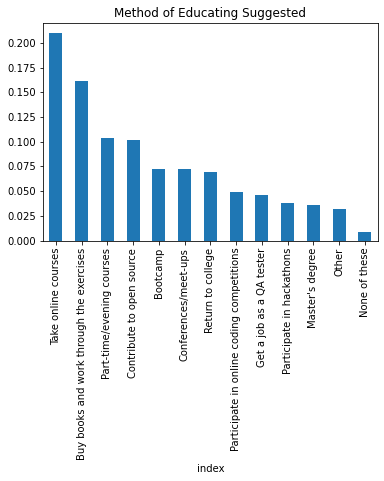

In [59]:
possible_vals = ["Take online courses", "Buy books and work through the exercises", 
                 "None of these", "Part-time/evening courses", "Return to college",
                 "Contribute to open source", "Conferences/meet-ups", "Bootcamp",
                 "Get a job as a QA tester", "Participate in online coding competitions",
                 "Master's degree", "Participate in hackathons", "Other"]

def clean_and_plot(df, title='Method of Educating Suggested', plot=True):
    '''
    INPUT 
        df - a dataframe holding the CousinEducation column
        title - string the title of your plot
        axis - axis object
        plot - bool providing whether or not you want a plot back
        
    OUTPUT
        study_df - a dataframe with the count of how many individuals
        Displays a plot of pretty things related to the CousinEducation column.
    '''
    study = df['CousinEducation'].value_counts().reset_index() #using reset index changes it to datafr
    #study.rename(columns={'index': 'method', 'CousinEducation': 'count'}, inplace=True)
    study_df = total_count(study, 'index', 'CousinEducation', possible_vals)

    study_df.set_index('index', inplace=True)
    if plot:
        (study_df/study_df.sum()).plot(kind='bar', legend=None);
        plt.title(title);
        plt.show()
#     props_study_df = study_df/study_df.sum()
#     return props_study_df
    
clean_and_plot(df)

## Result of CousinEducation analysis
We see that most of the answers involved "Take online courses" while "Master's degree" is among the last 3

## 1.2 Analysis of Higher Education using the "FormalEducation" columns

In [38]:
df.FormalEducation.value_counts()

Bachelor's degree                                                    21609
Master's degree                                                      11141
Some college/university study without earning a bachelor's degree     8129
Secondary school                                                      5908
Doctoral degree                                                       1308
I prefer not to answer                                                1109
Primary/elementary school                                             1047
Professional degree                                                    715
I never completed any formal education                                 426
Name: FormalEducation, dtype: int64

In [39]:
## We shall make a function that checks for Professional ,Masters or Doctoral degrees assigning 1 to these values and vice versa

In [40]:
def higher_ed(formal_ed_str):
    '''
    INPUT
        formal_ed_str - a string of one of the values from the Formal Education column
    
    OUTPUT
        return 1 if the string is  in ("Master's degree", "Professional degree","Doctoral degree")
        return 0 otherwise
    
    '''
    if formal_ed_str in ("Master's degree", "Professional degree","Doctoral degree"):
        return 1
    else:
        return 0
    

df["FormalEducation"].apply(higher_ed)[:5] #Test your function to assure it provides 1 and 0 values for the df

0    0
1    0
2    0
3    1
4    1
Name: FormalEducation, dtype: int64

In [60]:
df['HigherEd'] = df["FormalEducation"].apply(higher_ed)
higher_ed_perc = df['HigherEd'].mean()
higher_ed_perc

0.25614881693648817

**4.** Now we would like to find out if the proportion of individuals who completed one of these three programs feel differently than those that did not. Store a dataframe of only the individual's who had **HigherEd** equal to 1 in **ed_1**.  Similarly, store a dataframe of only the **HigherEd** equal to 0 values in **ed_0**.

Notice, we have already created the **HigherEd** column 

In [61]:
ed_1 = df[df['HigherEd']==1]
# Subset df to only those with HigherEd of 1
ed_0 = df[df['HigherEd']==0]
# Subset df to only those with HigherEd of 0


print(ed_1['HigherEd'][:5]) 
print(ed_0['HigherEd'][:5]) 

3    1
4    1
6    1
7    1
9    1
Name: HigherEd, dtype: int64
0    0
1    0
2    0
5    0
8    0
Name: HigherEd, dtype: int64


In [40]:
ed_1.shape,ed_0.shape

((13164, 155), (38228, 155))

In [63]:
## we can combine above operation in shape of 2 functions also
def total_count(df, col1, col2, look_for):
    '''
    INPUT:
    df - the pandas dataframe you want to search
    col1 - the column name you want to look through
    col2 - the column you want to count values from
    look_for - a list of strings you want to search for in each row of df[col]
    OUTPUT:
    new_df - a dataframe of each look_for with the count of how often it shows up
    '''
    # https://www.accelebrate.com/blog/using-defaultdict-python
    
    new_df = defaultdict(int)
    for val in look_for:
        for idx in range(df.shape[0]):
            if val in df[col1][idx]:
                new_df[val] += int(df[col2][idx])
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = [col1, col2]
    new_df.sort_values(col2, ascending=False, inplace=True)
    return new_df

In [66]:
possible_vals = ["Take online courses", "Buy books and work through the exercises", 
                 "None of these", "Part-time/evening courses", "Return to college",
                 "Contribute to open source", "Conferences/meet-ups", "Bootcamp",
                 "Get a job as a QA tester", "Participate in online coding competitions",
                 "Master's degree", "Participate in hackathons", "Other"]

def clean_and_plot_df(df, title='Method of Educating Suggested', plot=True):
    '''
    INPUT 
        df - a dataframe holding the CousinEducation column
        title - string the title of your plot
        axis - axis object
        plot - bool providing whether or not you want a plot back
        
    OUTPUT
        study_df - a dataframe with the count of how many individuals
        Displays a plot of pretty things related to the CousinEducation column.
    '''
    study = df['CousinEducation'].value_counts().reset_index() #using reset index changes it to datafr
    
    study_df = total_count(study, 'index', 'CousinEducation', possible_vals)

    study_df.set_index('index', inplace=True)
    if plot:
        (study_df/study_df.sum()).plot(kind='bar', legend=None);
        plt.title(title);
        plt.show()
    props_study_df = study_df/study_df.sum()
    return props_study_df
    


In [67]:
ed_1_perc = clean_and_plot_df(ed_1, 'Higher Formal Education', plot=False)
ed_0_perc = clean_and_plot_df(ed_0, 'Max of Bachelors Higher Ed', plot=False)

In [68]:
ed_1_perc.head(2)

CousinEducation
index                                                    
Take online courses                              0.206234
Buy books and work through the exercises         0.162959

In [69]:
## merging the two dataframes of Higher education and maximum Bac
comp_df = pd.merge(ed_1_perc, ed_0_perc, left_index=True, right_index=True)

In [70]:
comp_df.head(3)

CousinEducation_x  CousinEducation_y
index                                                                         
Take online courses                                0.206234           0.210548
Buy books and work through the exercises           0.162959           0.160867
Part-time/evening courses                          0.101736           0.103791

In [71]:
## renaming the columns
comp_df.columns = ['ed_1_perc', 'ed_0_perc']

In [72]:
comp_df['Diff_HigherEd_Vals'] = comp_df['ed_1_perc'] - comp_df['ed_0_perc']

In [73]:
comp_df.style.bar(subset=['Diff_HigherEd_Vals'], align='mid', color=['#d65f5f', '#5fba7d'])

### Conclusion of Higher Education Analysis
1- Regardless of formal education, online courses are the top suggested form of education

2- Regardless of formal education, online courses are the top suggested form of education'

3-Those with higher formal education suggest it more than those who do not have it'


# 2 Boot Camp Analysis at Job Placement and Salary

In [ ]:
# will work on it later

# 3,4 Predicting Salary

In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [75]:
df.describe()

Respondent  CareerSatisfaction  JobSatisfaction  HoursPerWeek  \
count  51392.000000        42695.000000     40376.000000  20600.000000   
mean   25696.500000            7.300574         6.957078      3.952282   
std    14835.736854            1.955444         2.167652      7.564722   
min        1.000000            0.000000         0.000000      0.000000   
25%    12848.750000            6.000000         6.000000      1.000000   
50%    25696.500000            8.000000         7.000000      1.000000   
75%    38544.250000            9.000000         8.000000      4.000000   
max    51392.000000           10.000000        10.000000     40.000000   

       StackOverflowSatisfaction         Salary  ExpectedSalary      HigherEd  
count               36592.000000   12891.000000     2566.000000  51392.000000  
mean                    8.429875   56298.480641    33142.220468      0.256149  
std                     1.390635   39880.905277    30162.988829      0.436509  
min                     0.000000       0.000000        0.000000      0.000000  
25%                     8.000000   26440.371839     4490.492484      0.000000  
50%                     9.000000   50000.000000    29364.263691      0.000000  
75%                    10.000000   80000.000000    50403.225806      1.000000  
max                    10.000000  197000.000000   187500.000000      1.000000

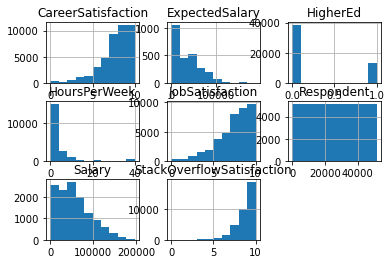

In [79]:
df.hist()

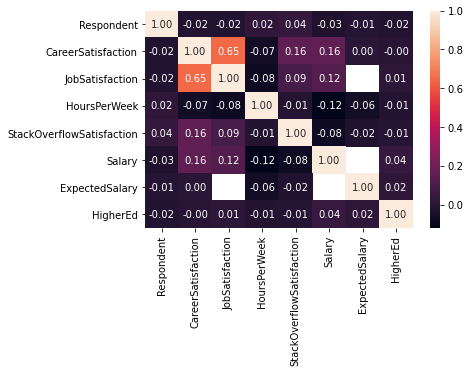

In [80]:
sns.heatmap(df.corr(),annot=True,fmt='.2f')

In [86]:
ix=df.corr().sort_values('HoursPerWeek', ascending=False).index
df_sorted = df.loc[:, ix]
df_sorted 

HoursPerWeek  Respondent  StackOverflowSatisfaction  HigherEd  \
0               0.0           1                        9.0         0   
1               NaN           2                        8.0         0   
2               NaN           3                        8.0         0   
3               5.0           4                       10.0         1   
4               NaN           5                        NaN         1   
...             ...         ...                        ...       ...   
51387           5.0       51388                        9.0         0   
51388           NaN       51389                        7.0         1   
51389           NaN       51390                        NaN         0   
51390           1.0       51391                        9.0         0   
51391           2.0       51392                        8.0         0   

       ExpectedSalary  CareerSatisfaction  JobSatisfaction    Salary  
0                 NaN                 NaN              NaN       NaN  
1             37500.0                 NaN              NaN       NaN  
2                 NaN                 8.0              9.0  113750.0  
3                 NaN                 6.0              3.0       NaN  
4                 NaN                 6.0              8.0       NaN  
...               ...                 ...              ...       ...  
51387             NaN                 7.0              3.0   58000.0  
51388             NaN                 NaN              NaN       NaN  
51389             NaN                10.0             10.0       NaN  
51390             NaN                 6.0              7.0   40000.0  
51391             NaN                 8.0              8.0       NaN  

[51392 rows x 8 columns]

### Correlation map results
#### 1- The column with strongest correlation with Salary is "CareerSatisfaction"

#### 2-The data suggests more hours worked Does not relates to higher salary

#### 3-The strongest negative relationship has correlation =-0.15

Note :Data in the 'CareerSatisfaction' column meant missing data in three other columns

### Removing or Imputing Missing values before making predictions 

The column with mixed heights, we should be able to (for the most part) map those to a consistent measurement (all meters or all feet). We don't want to just drop this.

If the response is missing, for those rows, we have nothing to predict. You might be interested in predicting those values. Without a target/response to predict, your model cannot learn. These rows are not providing information for training any sort of supervised learning model.

Though it is common to drop columns just because not many values exist, there may be value to grouping rows that have a column missing as compared to rows that do not have a missing value for that particular column.

If there is no variability (all the values are the same) in a column, it does not provide value for prediction or finding differences in your data. It should be dropped for this reason. Keeping it doesn't really hurt, but it can lead to confusing results as we will see later in this lesson.

When you have incorrect data, you do not want to input this information into your conclusions. You should attempt to correct these values, or you may need to drop them.

## Imputing Values (before running regression model to predict salary)

### Predicting salary using regression model just my dropping Missing values and then compare this model with the model which will use Imputation

In [89]:
#Subset to only quantitative vars
num_vars = df[['Salary', 'CareerSatisfaction', 'HoursPerWeek', 'JobSatisfaction', 'StackOverflowSatisfaction']]


In [91]:
# drop all the missing values in all rows
df_dropna = num_vars.dropna(axis=0)

In [92]:
#Split into explanatory and response variables
X = df_dropna[['CareerSatisfaction', 'HoursPerWeek', 'JobSatisfaction', 'StackOverflowSatisfaction']]
y = df_dropna['Salary']

In [93]:
#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit
        
#Predict and score the model
y_test_preds = lm_model.predict(X_test) 

In [96]:
# checking the R2 score
from sklearn.metrics import r2_score
R2=r2_score( y_test, y_test_preds)
R2

0.030994664959115625

In [97]:

"The r-squared score for your model was {} on {} values.".format(R2, len(y_test))

'The r-squared score for your model was 0.030994664959115625 on 1602 values.'

In [102]:
np.sum(df.Salary.notnull())

12891

In [101]:
len(y_train) + len(y_test_preds)

5338

## Predicting salay by using Imputation instead of dropping all the Null values as before
### Previously we dropped all the NA values in all the num_vars dataframe rows (num_vars.dropna(axis=0))
### Now 
1-only drop NA values from the Target 'Salary' (num_vars.dropna(subset=['Salary'], axis=0)) and then 

2- Drop all column which has all NAN entries  

3-Finally impute all the ramaining columns with their mean values .
#### **Remember last time we dropped all the NA values from all the columns, this time we dropped NA values only from the Target column 'Salary', and the rest of the NA values in the columns are imputed by their mean values**

In [106]:
drop_sal_df = num_vars.dropna(subset=['Salary'], axis=0) #Drop the rows with missing salaries

# test look
drop_sal_df.head()

Salary  CareerSatisfaction  HoursPerWeek  JobSatisfaction  \
2   113750.0                 8.0           NaN              9.0   
14  100000.0                 8.0           NaN              8.0   
17  130000.0                 9.0           NaN              8.0   
18   82500.0                 5.0           NaN              3.0   
22  100764.0                 8.0           NaN              9.0   

    StackOverflowSatisfaction  
2                         8.0  
14                        8.0  
17                        8.0  
18                        NaN  
22                        8.0

In [119]:
# how='all' in dropna shows we are dropping the complete NA columns
drop_df=drop_sal_df.dropna(how='all',axis=1)

In [120]:
drop_df.head(3)

Salary  CareerSatisfaction  HoursPerWeek  JobSatisfaction  \
2   113750.0                 8.0           NaN              9.0   
14  100000.0                 8.0           NaN              8.0   
17  130000.0                 9.0           NaN              8.0   

    StackOverflowSatisfaction  
2                         8.0  
14                        8.0  
17                        8.0

In [121]:
## Lambda function to replace the mean in the columns
fill_mean= lambda col : col.fillna(col.mean())
fill_df=drop_df.apply(fill_mean,axis=0)
fill_df.head(3)

Salary  CareerSatisfaction  HoursPerWeek  JobSatisfaction  \
2   113750.0                 8.0       2.64292              9.0   
14  100000.0                 8.0       2.64292              8.0   
17  130000.0                 9.0       2.64292              8.0   

    StackOverflowSatisfaction  
2                         8.0  
14                        8.0  
17                        8.0

In [114]:
fill_df.shape

(12891, 5)

In [124]:
#Split into explanatory and response variables
X = fill_df[['CareerSatisfaction', 'HoursPerWeek', 'JobSatisfaction', 'StackOverflowSatisfaction']]
y = fill_df['Salary']

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit
        
#Predict and score the model
y_test_preds = lm_model.predict(X_test) 

#Rsquared and y_test
rsquared_score = r2_score(y_test, y_test_preds)
length_y_test = len(y_test)

"The r-squared score for your model was {} on {} values.".format(rsquared_score, length_y_test)

'The r-squared score for your model was 0.04072431792894726 on 3868 values.'

## Result .Now more Salaries are predicted but the R2 values is still low (0.04).
## We need to include more features. This can be done if we add the categorical variables by creating dummy variables . This creation of dummy variables should be done before the Imputing the mean values as shown below:

In [126]:
# first pull a list of the column names of the categorical variables
cat_df = df.select_dtypes(include=['object'])
cat_cols_lst = cat_df.columns


### Making a function that will take categorical columns and output a Dataframe with dummy variables for each column and (v important) remove the Categorical column also (after its replaced by the dummy variables)

In [128]:
def create_dummy_df(df, cat_cols, dummy_na):
    '''
    INPUT:
    df - pandas dataframe with categorical variables you want to dummy
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    
    OUTPUT:
    df - a new dataframe that has the following characteristics:
            1. contains all columns that were not specified as categorical
            2. removes all the original columns in cat_cols
            3. dummy columns for each of the categorical columns in cat_cols
            4. if dummy_na is True - it also contains dummy columns for the NaN values
            5. Use a prefix of the column name with an underscore (_) for separating 
    '''
    for col in  cat_cols:
        try:
            # for each cat add dummy var, drop original column
            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=dummy_na)], axis=1)
        except:
            continue
    return df

In [132]:
# step-1 :Drop the rows with missing salaries.Note: we are using df with all the columns
drop_sal_df = df.dropna(subset=['Salary'], axis=0) 
# step-2 : dropping the complete NA columns (how='all' in dropna shows wcomplete NA columns)
drop_df=drop_sal_df.dropna(how='all',axis=1)
# step-3 : 
df_new = create_dummy_df(drop_df, cat_cols_lst, dummy_na=False)
## Lambda function to replace the mean in the columns
fill_mean= lambda col : col.fillna(col.mean())
fill_df=df_new.apply(fill_mean,axis=0)
fill_df.head(3)

Respondent  CareerSatisfaction  JobSatisfaction  HoursPerWeek  \
2            3                 8.0              9.0       2.64292   
14          15                 8.0              8.0       2.64292   
17          18                 9.0              8.0       2.64292   

    StackOverflowSatisfaction    Salary  HigherEd  \
2                         8.0  113750.0         0   
14                        8.0  100000.0         1   
17                        8.0  130000.0         0   

    ProgramHobby_Yes, I contribute to open source projects  \
2                                                   0        
14                                                  0        
17                                                  0        

    ProgramHobby_Yes, I program as a hobby  ProgramHobby_Yes, both  ...  \
2                                        0                       1  ...   
14                                       1                       0  ...   
17                                       0                       1  ...   

    QuestionsInteresting_Strongly agree  \
2                                     0   
14                                    0   
17                                    0   

    QuestionsInteresting_Strongly disagree  QuestionsConfusing_Disagree  \
2                                        0                            1   
14                                       0                            1   
17                                       0                            1   

    QuestionsConfusing_Somewhat agree  QuestionsConfusing_Strongly agree  \
2                                   0                                  0   
14                                  0                                  0   
17                                  0                                  0   

    QuestionsConfusing_Strongly disagree  InterestedAnswers_Disagree  \
2                                      0                           0   
14                                     0                           0   
17                                     0                           0   

    InterestedAnswers_Somewhat agree  InterestedAnswers_Strongly agree  \
2                                  0                                 0   
14                                 0                                 0   
17                                 0                                 0   

    InterestedAnswers_Strongly disagree  
2                                     0  
14                                    0  
17                                    0  

[3 rows x 21110 columns]

In [ ]:
X=[100,200,300,400,500,600]

Which columns had no missing values? Provide a set of column names that have no missing values.

In [133]:
#Split into explanatory and response variables
X = fill_df.drop('Salary', axis=1)
y = fill_df['Salary']

In [134]:
#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit
        
#Predict and score the model
y_test_preds = lm_model.predict(X_test) 

#Rsquared and y_test
rsquared_score = r2_score(y_test, y_test_preds)
length_y_test = len(y_test)

"The r-squared score for your model was {} on {} values.".format(rsquared_score, length_y_test)

'The r-squared score for your model was -0.5252856551252225 on 3868 values.'

In [135]:
y_train_preds = lm_model.predict(X_train)

In [137]:
 train_score = r2_score(y_train, y_train_preds)

In [138]:
"The r-squared score for Training set model is {} .".format(train_score)

'The r-squared score for Training set model is 1.0 .'

## Results of Salary Predictions using Imputation mean values and replacing categorical variables by dummy variables
#### The R-square for train data is =1 while for test data it is 50% which shows 
# overfitting

# Final Model for Predictions
## Step-1 Function for cleaning data with the following properties
'''
    
    INPUT
    df - pandas dataframe 
    
    OUTPUT
    X - A matrix holding all of the variables you want to consider when predicting the response
    y - the corresponding response vector
    
    This function cleans df using the following steps to produce X and y:
    1. Drop all the rows with no salaries
    2. Create X as all the columns that are not the Salary column
    3. Create y as the Salary column
    4. Drop the Salary, Respondent, and the ExpectedSalary columns from X
    5. For each numeric variable in X, fill the column with the mean value of the column.
    6. Create dummy columns for all the categorical variables in X, drop the original columns
    '''



In [199]:
def clean_data(df):

    # Drop rows with missing salary values
    df = df.dropna(subset=['Salary'], axis=0)
    y = df['Salary']
    
    #Drop respondent and expected salary columns
    df = df.drop(['Respondent', 'ExpectedSalary', 'Salary'], axis=1)
    
    # Fill numeric columns with the mean
    num_vars = df.select_dtypes(include=['float', 'int']).columns
    for col in num_vars:
        df[col].fillna((df[col].mean()), inplace=True)
        
    # Dummy the categorical variables
    cat_vars = df.select_dtypes(include=['object']).copy().columns
    for var in  cat_vars:
        # for each cat add dummy var, drop original column
        df = pd.concat([df.drop(var, axis=1), pd.get_dummies(df[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)
    
    X = df
    return X, y
    
#Use the function to create X and y
X, y = clean_data(df)    

## Cutoff Threshold function
We are trying to get different sets of feature matrix X where the no of Null values are above the threshold given in the following list.

cutoffs = [5000, 3500, 2500, 1000, 100, 50, 30, 25]

As a result we get 8 number of reduce_X values ( it is 8 because we are looping through the list of 8 cutoff values)

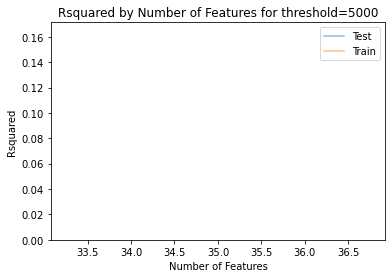

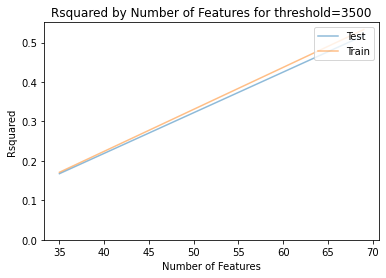

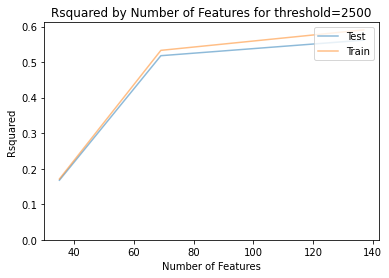

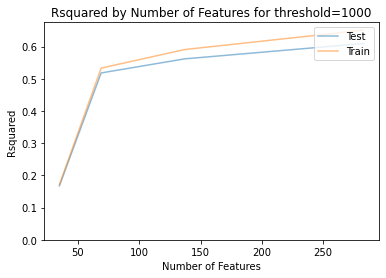

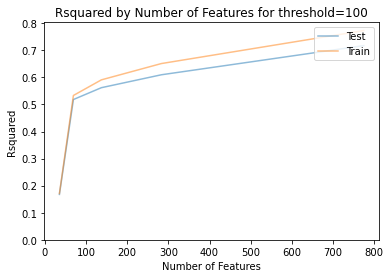

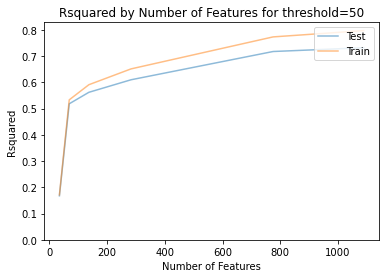

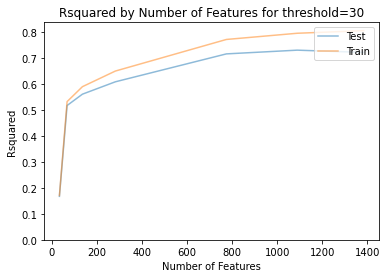

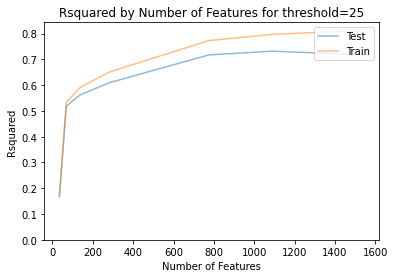

In [231]:
cutoffs = [5000, 3500, 2500, 1000, 100, 50, 30, 25]
r2_scores_test, r2_scores_train, num_feats, results = [], [], [], dict()
for cutoff in cutoffs:

    #reduce X matrix
    reduce_X = X.iloc[:, np.where((X.sum() > cutoff) == True)[0]]
    num_feats.append(reduce_X.shape[1])

    #split the data into train and test
    X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = .30, random_state=42)

    #fit the model and obtain pred response
    lm_model = LinearRegression(normalize=True)
    lm_model.fit(X_train, y_train)
    y_test_preds = lm_model.predict(X_test)
    y_train_preds = lm_model.predict(X_train)

    #append the r2 value from the test set
    r2_scores_test.append(r2_score(y_test, y_test_preds))
    r2_scores_train.append(r2_score(y_train, y_train_preds))
    results[str(cutoff)] = r2_score(y_test, y_test_preds)

# if plot:
    plt.plot(num_feats, r2_scores_test, label="Test", alpha=.5)
    plt.plot(num_feats, r2_scores_train, label="Train", alpha=.5)
    plt.xlabel('Number of Features')
    plt.ylabel('Rsquared')
    plt.title('Rsquared by Number of Features for threshold=' + str(cutoff))
    plt.legend(loc=1)

    plt.ylim(bottom=0) 
    plt.show()

In [223]:
# we saved the r2 score for each threshold of non-zero values in dummy categorical vars in the dictionary 'result' as shown below
results

{'300': 0.6615208153538977,
 '200': 0.6791554498911303,
 '100': 0.7171939655513617,
 '50': 0.7315876324736394,
 '30': 0.7227809175623996,
 '25': 0.7173305342707823}

In [224]:
best_cutoff = max(results, key=results.get)
best_cutoff 

'50'

### So the best cutoff value - list of ints,or cutoff for number of non-zero values in dummy categorical vars =50



In [225]:
# so we reduce the feature matrix X according to non zero values threshold of >50
new_reduce_X=X.iloc[:, np.where((X.sum() > int(best_cutoff)) == True)[0]]

In [ ]:
#split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(new_reduce_X, y, test_size = 0.3, random_state=42)

#fit the model
lm_model = LinearRegression(normalize=True)
lm_model.fit(X_train, y_train)

In [226]:
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)

r2_score_test=r2_score(y_test, y_test_preds)
r2_score_train=r2_score(y_train, y_train_preds)

# Final Result of Salary predictions

In [227]:
print('R-square score for Train set={} , R-square score for Test set={}'.format(r2_score_train,r2_score_test))

R-square score for Train set=0.8112967496884347 , R-square score for Test set=0.7173305342707823


In [234]:
print(X_train.shape[1]) #Number of columns
print(r2_scores_test[np.argmax(r2_scores_test)]) # The model we should implement test_r2
print(r2_scores_train[np.argmax(r2_scores_test)]) 

1542
0.7315876324736394
0.7967813285136743


## The overfitting problem has been solved

# Which Features are the most important in the Linear Model
## Because we are using Ridge regression model. One of the best way to find which X-feature matters is to look at weight of the co-efficients of the Linear Model.Getting co-efficents of the LM model.
## Also beause our features are Normalized, we can just look at how large the co-efficent is .The sign is just showing the direction of the impact.


In [232]:
# make a function that takes the lm_model.coef_ and the X_Train and returns a dataframe with 3 columns i.e X_train.columns , lm_model.coef_ and absolute values of lm_model.coef_
def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

#A quick look at the top results
coef_df.head(20)

est_int         coefs     abs_coefs
58       FormalEducation_Doctoral degree  4.885574e+16  4.885574e+16
61       FormalEducation_Master's degree  4.885574e+16  4.885574e+16
63   FormalEducation_Professional degree  4.885574e+16  4.885574e+16
4                               HigherEd -4.885574e+16  4.885574e+16
53                 Country_United States  5.558494e+04  5.558494e+04
36                        Country_Norway  3.696671e+04  3.696671e+04
9                      Country_Australia  3.674015e+04  3.674015e+04
466                Currency_Swiss francs  3.324696e+04  3.324696e+04
136       YearsCodedJob_20 or more years  2.954021e+04  2.954021e+04
15                         Country_China  2.911702e+04  2.911702e+04
456   Currency_Chinese yuan renminbi (¥) -2.811448e+04  2.811448e+04
17                       Country_Denmark  2.779447e+04  2.779447e+04
49                   Country_Switzerland  2.703136e+04  2.703136e+04
35                   Country_New Zealand  2.701766e+04  2.701766e+04
26                       Country_Ireland  2.596182e+04  2.596182e+04
27                        Country_Israel  2.592822e+04  2.592822e+04
134         YearsCodedJob_19 to 20 years  2.585747e+04  2.585747e+04
460        Currency_Mexican pesos (MXN$) -2.492857e+04  2.492857e+04
133         YearsCodedJob_18 to 19 years  2.444842e+04  2.444842e+04
127         YearsCodedJob_12 to 13 years  2.419383e+04  2.419383e+04

# Conclusion of importance of Features
country appears to be very influential item as well as how many years of experience
But isnt the case that the more years of experience you have, the higher you are paid.
We clearly see, that in certain countries you are paid better

In [ ]:
## Previous operation of getting optimal cut off values for Non zero dummy categorical can be combined as a single function as shown below
def find_optimal_lm_mod(X, y, cutoffs, test_size = .30, random_state=42, plot=True):
    '''
    INPUT
    X - pandas dataframe, X matrix
    y - pandas dataframe, response variable
    cutoffs - list of ints, cutoff for number of non-zero values in dummy categorical vars
    test_size - float between 0 and 1, default 0.3, determines the proportion of data as test data
    random_state - int, default 42, controls random state for train_test_split
    plot - boolean, default 0.3, True to plot result

    OUTPUT
    r2_scores_test - list of floats of r2 scores on the test data
    r2_scores_train - list of floats of r2 scores on the train data
    lm_model - model object from sklearn
    X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model
    '''
    r2_scores_test, r2_scores_train, num_feats, results = [], [], [], dict()
    for cutoff in cutoffs:

        #reduce X matrix
        reduce_X = X.iloc[:, np.where((X.sum() > cutoff) == True)[0]]
        num_feats.append(reduce_X.shape[1])

        #split the data into train and test
        X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

        #fit the model and obtain pred response
        lm_model = LinearRegression(normalize=True)
        lm_model.fit(X_train, y_train)
        y_test_preds = lm_model.predict(X_test)
        y_train_preds = lm_model.predict(X_train)

        #append the r2 value from the test set
        r2_scores_test.append(r2_score(y_test, y_test_preds))
        r2_scores_train.append(r2_score(y_train, y_train_preds))
        results[str(cutoff)] = r2_score(y_test, y_test_preds)

    if plot:
        plt.plot(num_feats, r2_scores_test, label="Test", alpha=.5)
        plt.plot(num_feats, r2_scores_train, label="Train", alpha=.5)
        plt.xlabel('Number of Features')
        plt.ylabel('Rsquared')
        plt.title('Rsquared by Number of Features')
        plt.legend(loc=1)
        plt.show()

    best_cutoff = max(results, key=results.get)

    #reduce X matrix
    reduce_X = X.iloc[:, np.where((X.sum() > int(best_cutoff)) == True)[0]]
    num_feats.append(reduce_X.shape[1])

    #split the data into train and test
    X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

    #fit the model
    lm_model = LinearRegression(normalize=True)
    lm_model.fit(X_train, y_train)

    return r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test